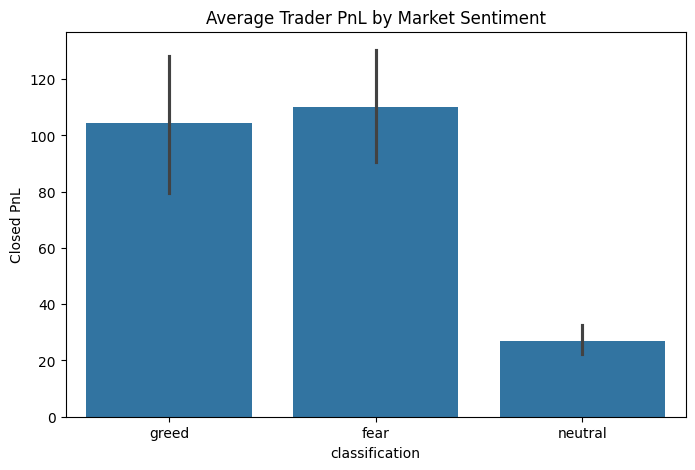

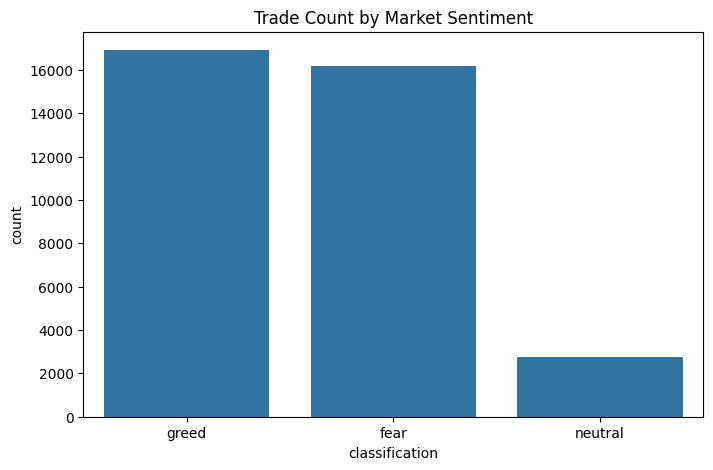

{'avg_pnl_by_sentiment': {'fear': 110.13, 'greed': 104.45, 'neutral': 27.09}, 'trade_counts': {'greed': 16913, 'fear': 16195, 'neutral': 2756}}


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load datasets
trader_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

# Preprocess sentiment dataset
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df['classification'] = sentiment_df['classification'].str.lower().map({
    'extreme fear': 'fear',
    'fear': 'fear',
    'neutral': 'neutral',
    'greed': 'greed',
    'extreme greed': 'greed'
})

# Preprocess trader dataset using correct column names
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')
trader_df['date'] = trader_df['Timestamp IST'].dt.floor('d')  # Just the date part
trader_df['Closed PnL'] = pd.to_numeric(trader_df['Closed PnL'], errors='coerce')

# Merge on 'date'
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')
merged_df = merged_df.dropna(subset=['classification'])



# Plot 1: Avg. PnL by Sentiment
plt.figure(figsize=(8, 5))
sns.barplot(data=merged_df, x='classification', y='Closed PnL')
plt.title("Average Trader PnL by Market Sentiment")
plt.ylabel("Closed PnL")
plt.show()
plt.close()

# Plot 2: Count of trades per sentiment
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='classification')
plt.title("Trade Count by Market Sentiment")
plt.show()
plt.close()

# Summary metrics
summary = {
    "avg_pnl_by_sentiment": merged_df.groupby('classification')['Closed PnL'].mean().round(2).to_dict(),
    "trade_counts": merged_df['classification'].value_counts().to_dict()
}

print(summary)


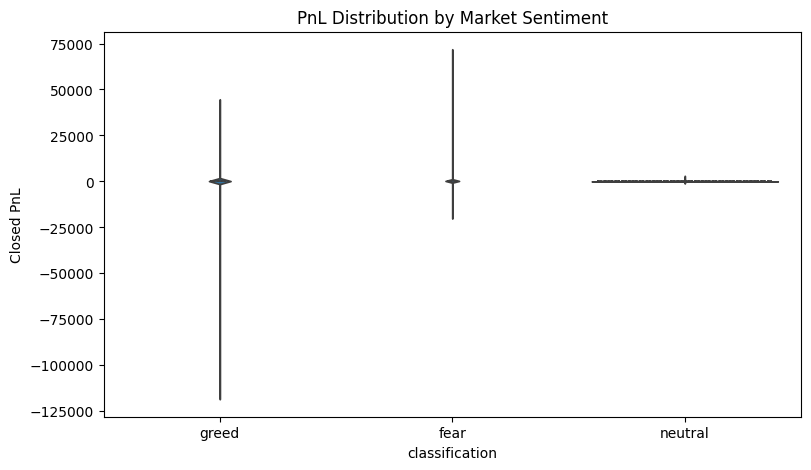

In [2]:
plt.figure(figsize=(9, 5))
sns.violinplot(data=merged_df, x='classification', y='Closed PnL', inner='quartile')
plt.title("PnL Distribution by Market Sentiment")
plt.show()


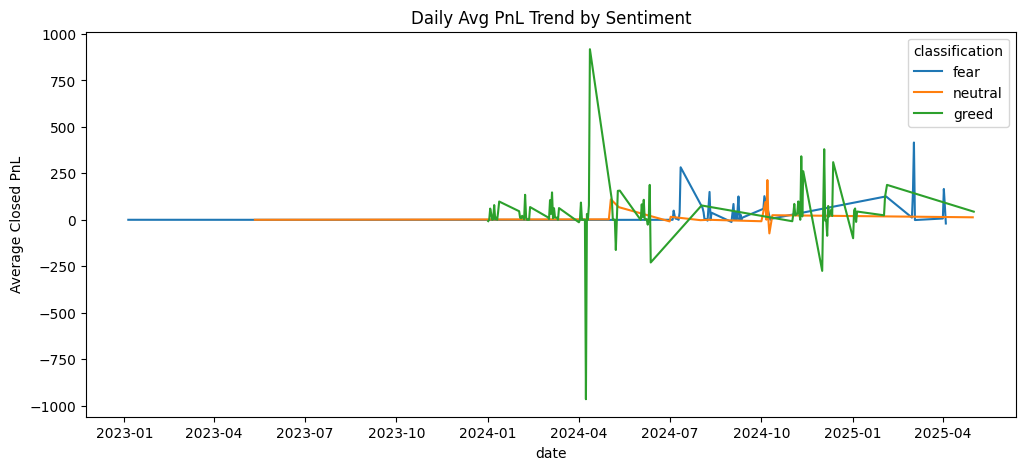

In [3]:
daily_avg = merged_df.groupby(['date', 'classification'])['Closed PnL'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_avg, x='date', y='Closed PnL', hue='classification')
plt.title("Daily Avg PnL Trend by Sentiment")
plt.ylabel("Average Closed PnL")
plt.show()


In [4]:
summary_df = merged_df.groupby('classification')['Closed PnL'].agg(['mean', 'std']).reset_index()
summary_df['Risk_Adjusted_Return'] = (summary_df['mean'] / summary_df['std']).round(2)
print(summary_df[['classification', 'Risk_Adjusted_Return']])


  classification  Risk_Adjusted_Return
0           fear                  0.09
1          greed                  0.07
2        neutral                  0.19


In [6]:
top_coins_fear = merged_df[merged_df['classification'] == 'fear'].groupby('Coin')['Closed PnL'].mean().sort_values(ascending=False).head(7)
top_coins_greed = merged_df[merged_df['classification'] == 'greed'].groupby('Coin')['Closed PnL'].mean().sort_values(ascending=False).head(7)

print("Top 7 Coins in Fear Phase:\n", top_coins_fear)
print("Top 7 Coins in Greed Phase:\n", top_coins_greed)


Top 7 Coins in Fear Phase:
 Coin
ENA      1000.195841
USUAL     711.273747
SOL       696.352347
XAI       262.409978
SPX       146.943567
ETH       127.496087
APT       112.350000
Name: Closed PnL, dtype: float64
Top 7 Coins in Greed Phase:
 Coin
USUAL     759.791153
@85       678.668791
PNUT      449.720289
PEOPLE    360.646005
@107      313.748783
SOL       311.253433
ME        221.435970
Name: Closed PnL, dtype: float64
